# Project - Data Science
![DS_steps.png](DS_steps.png)

## Fullname (nickname): Niphon Chanlen (Bird)


## Project Topic: Online Teacher Professional Development about Buoancy: Who succeeded, Who failed and Did it work?

---
## Current Situation / Problem Statement

1. Less than 50% of registered teachers completed the self-pace online course about buoyancy. Who are the teacher who did and did not complete the course? How can we increase the retention and successful rate?
2. Does the course really help teachers improve in their content knowledge and self-efficacy?







## Objectives:
The insights and recoomendation from this study might help the course instructors improve the course design so to help maintain the retention and successful rate of teachers who are at risk. 

## Hypothesis-driven Questions:

1. Do teachers who completed and did not the course have different demographic e.g. gender, education level, teaching level, teaching experience ?
2. Do teacher’s prior content knowledge and self-efficacy affect their completion of the course?
3. Do teachers’ content knowledge and self-efficacy improve after class completion? 




## Dataset:
There are 2 main datasets
# 1. Teachers' background infomation: 'buoyancy_teacher_info.xlsx'
  1.1 Username
  1.2 EdBackground(educational background major)
  1.3 Phys_major (has physics major?)
  1.4 Teach_exp (number of years in teaching experience)
  1.5 EdLevel (highest educational background recieved)
  1.6 Teach_sub_gensci (teach general scinece?)
  1.7 ระดับชั้นที่สอน (grade level of teaching)
  1.8 Teach_level (level of teaching)
  1.9 M2_teacher (teach grade 8?) 
# 2. Teachers' test score : buoyancy_teacher_score.xlsx
  2.1 Username
  2.2 pretest_concept (pretest scores in buoyancy)
  2.3 pre_selfefficacy ( pretest scores in self efficacy questionaire)
  2.4 posttest_concept (posttest scores in buoyancy)
  2.5 posttest_noitem  (number of submiited items in posttest)
  2.5 post_selfefficacy ( posttest scores in self efficacy questionaire)

In [ ]:
#connect GGD
import os
from google.colab import drive

drive.mount("/content/gdrive")

root_path = r"/content/gdrive/MyDrive/Colab Notebooks/PYT06/Day 4" #Colab Notebooks is a folder in Google drive
os.chdir(root_path)
os.getcwd()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/MyDrive/Colab Notebooks/PYT06/Day 4'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
!pip install matplotlib
#import files
df_info = pd.read_excel('buoyancy_teacher_info.xlsx')
df_score = pd.read_excel('buoyancy_teacher_score.xlsx')
#Checking heading
print(df_info.head())
print("---------------------")
print(df_score.head())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
        Username  EdBackground_code EdBackground Phys_major   Teach_exp  \
0     wansa_IPST                  3     Engineer        Yes         0-5   
1  3340400134073                  4    Sci other         No  มากกว่า 20   
2            yod                  4    Sci other         No        6-10   
3            fai                  3     Engineer        Yes        6-10   
4       Nutchaya                  6    Ed nonsci         No       11-15   

     EdLevel Teach_sub_gensci     ระดับชั้นที่สอน      Teach_level M2_teacher  
0     Master               No              อื่น ๆ            Other         No  
1     Master              Yes  ป.6, ม.1, ม.2, ม.3  lower secondary        Yes  
2  Bachelor               Yes                 ม.1  lower secondary         No  
3  Bachelor               Yes       ป.4, ป.5, ป.6          Primary         No  
4     Master              Yes       ป.4, ป.5, ป.6 

# Asking the first hypothesis-driven questions


## Data Preparation (Data Cleaning):


Description...
1. Merge 2 dataset by matching Username 
2. Explore dataset and check for null value
3. Drop unwanted columns
4. Drop null values

#### Section 1 : Merge 2 dataset by matching Username





In [ ]:
df = df_info.merge(df_score, how='left', on='Username')

#### Section 2 : Explore dataset and check for null value

In [ ]:
print(df.head()) 
print("---------------------")
print(df.shape)
print("---------------------")
print(df.info())
print("---------------------")
df.isnull().sum()

        Username  EdBackground_code EdBackground Phys_major   Teach_exp  \
0     wansa_IPST                  3     Engineer        Yes         0-5   
1  3340400134073                  4    Sci other         No  มากกว่า 20   
2            yod                  4    Sci other         No        6-10   
3            fai                  3     Engineer        Yes        6-10   
4       Nutchaya                  6    Ed nonsci         No       11-15   

     EdLevel Teach_sub_gensci     ระดับชั้นที่สอน      Teach_level M2_teacher  \
0     Master               No              อื่น ๆ            Other         No   
1     Master              Yes  ป.6, ม.1, ม.2, ม.3  lower secondary        Yes   
2  Bachelor               Yes                 ม.1  lower secondary         No   
3  Bachelor               Yes       ป.4, ป.5, ป.6          Primary         No   
4     Master              Yes       ป.4, ป.5, ป.6          Primary         No   

   pretest_concept  posttest_noitem  posttest_concept  pre_sel

Username               0
EdBackground_code      0
EdBackground           0
Phys_major             0
Teach_exp              5
EdLevel                0
Teach_sub_gensci       0
ระดับชั้นที่สอน        0
Teach_level            0
M2_teacher             0
pretest_concept       61
posttest_noitem      141
posttest_concept     124
pre_selfefficacy      44
post_selfefficacy    189
dtype: int64

#### Section 3 : Drop unwanted columns

In [ ]:
df.drop(['posttest_concept','ระดับชั้นที่สอน','post_selfefficacy'], axis=1, inplace=True)
print(df.head())

        Username  EdBackground_code EdBackground Phys_major   Teach_exp  \
0     wansa_IPST                  3     Engineer        Yes         0-5   
1  3340400134073                  4    Sci other         No  มากกว่า 20   
2            yod                  4    Sci other         No        6-10   
3            fai                  3     Engineer        Yes        6-10   
4       Nutchaya                  6    Ed nonsci         No       11-15   

     EdLevel Teach_sub_gensci      Teach_level M2_teacher  pretest_concept  \
0     Master               No            Other         No              8.0   
1     Master              Yes  lower secondary        Yes              5.0   
2  Bachelor               Yes  lower secondary         No              5.0   
3  Bachelor               Yes          Primary         No              5.0   
4     Master              Yes          Primary         No              5.0   

   posttest_noitem  pre_selfefficacy  
0              3.0              56.0  
1 

In [ ]:
df.isnull().sum()

Username               0
EdBackground_code      0
EdBackground           0
Phys_major             0
Teach_exp              5
EdLevel                0
Teach_sub_gensci       0
Teach_level            0
M2_teacher             0
pretest_concept       61
posttest_noitem      141
pre_selfefficacy      44
dtype: int64

### Section 4 : Drop null values

In [ ]:
df.dropna(subset=['pretest_concept','posttest_noitem','Teach_exp','pre_selfefficacy'], inplace=True)
print(df.isnull().sum())

Username             0
EdBackground_code    0
EdBackground         0
Phys_major           0
Teach_exp            0
EdLevel              0
Teach_sub_gensci     0
Teach_level          0
M2_teacher           0
pretest_concept      0
posttest_noitem      0
pre_selfefficacy     0
dtype: int64


## Exploratory Data Analysis (EDA):

Description...
1. checking simple statistic and data dsitribution
2. Grouping teacher into two groups; succeed and dropout
3. Grouping teachers into two groups based on thier pre-test performance both concept and self efficacy
4.  Finding out teachers who dropouted and who succeeded based on thier demographic and test scores

#### Section 1: checking simple statistic and data distribution

In [ ]:
print(df.describe())

       EdBackground_code  pretest_concept  posttest_noitem  pre_selfefficacy
count         512.000000       512.000000       512.000000        512.000000
mean            4.679688         6.675781        16.087891         63.380859
std             1.206204         3.078293         3.045977          6.452708
min             1.000000         1.000000         3.000000         47.000000
25%             4.000000         5.000000        17.000000         59.000000
50%             5.000000         6.000000        17.000000         63.000000
75%             5.000000         8.000000        17.000000         67.000000
max             8.000000        16.000000        17.000000         84.000000


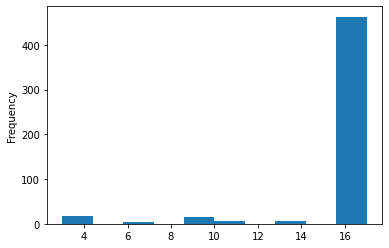

In [ ]:
df['posttest_noitem'].plot(kind = 'hist')
plt.show()

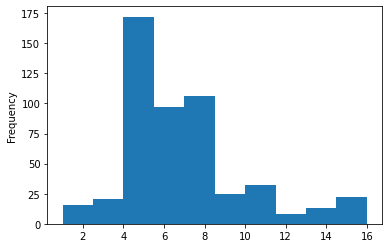

In [ ]:
df['pretest_concept'].plot(kind = 'hist')
plt.show()

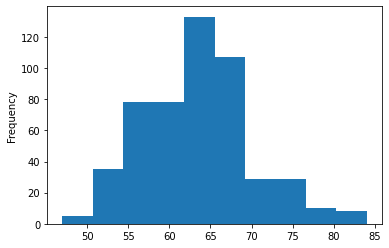

In [ ]:
df['pre_selfefficacy'].plot(kind = 'hist')
plt.show()

#### Section 2 : Grouping teacher into two groups; succeed and dropout
succeed teachers completed all pre-tests and all 17 post test items in buoyancy
dropout teachers completed all pre-tests but did not submit 17 post test items in buoyabcy

In [ ]:
SuccCondition = [
    (df['posttest_noitem'] < 17),
    (df['posttest_noitem'] == 17)
]
value = ['dropout','succeed']
df['Success'] = np.select(SuccCondition,value)
print(df.sample(10))
print("---------------------")
df.value_counts('Success')

              Username  EdBackground_code  EdBackground Phys_major  \
660         kasmawatee                  5  Ed Sci other         No   
127    sujindachaitong                  6     Ed nonsci         No   
381  duangpornsookprom                  4     Sci other         No   
418               19a2                  5  Ed Sci other         No   
257        orataipaeye                  6     Ed nonsci         No   
122        chalremphon                  5  Ed Sci other         No   
618         jiraporn41                  6     Ed nonsci         No   
317               9a3d                  5  Ed Sci other         No   
683          tukta1318                  6     Ed nonsci         No   
385        hataipathra                  5  Ed Sci other         No   

      Teach_exp    EdLevel Teach_sub_gensci      Teach_level M2_teacher  \
660         0-5  Bachelor               Yes          Primary         No   
127  มากกว่า 20  Bachelor               Yes  lower secondary        Yes   
381 

Success
succeed    463
dropout     49
dtype: int64

#### Section 3 : Grouping teachers into two groups based on thier pre-test performance both concept and self *efficacy*

In [ ]:
#Grouping teachers into two groups based on thier pre-test in buoyancy concept

In [ ]:
x= df['pretest_concept'].mean()
PretestCondition = [
    (df['pretest_concept'] < x),
    (df['pretest_concept'] >= x)
]
value = ['Low Pretest','High Pretest']
df['Pre Test Level'] = np.select(PretestCondition,value)
print(df.sample(10))
print("---------------------")
df.value_counts('Pre Test Level')

                  Username  EdBackground_code  EdBackground Phys_major  \
339  minkmantana_gmail_com                  7     Sci other         No   
349                 fon111                  6     Ed nonsci         No   
563             rewadee186                  5  Ed Sci other         No   
344                chomphu                  4     Sci other         No   
324            ntamyim2530                  6     Ed nonsci         No   
341                 namaoy                  5  Ed Sci other         No   
517                   6875                  6     Ed nonsci         No   
81               krusawbio                  4     Sci other         No   
583              malai1972                  6     Ed nonsci         No   
540        jutharatkrupooh                  4     Sci other         No   

      Teach_exp    EdLevel Teach_sub_gensci      Teach_level M2_teacher  \
339        6-10  Bachelor               Yes          Primary         No   
349       16-20     Master         

Pre Test Level
Low Pretest     306
High Pretest    206
dtype: int64

In [ ]:
#Grouping teachers into two groups based on thier pre-test in self efficacy

In [ ]:
y= df['pre_selfefficacy'].mean()
PreSelfEffCondition = [
    (df['pre_selfefficacy'] < y),
    (df['pre_selfefficacy'] >= y)
]
value = ['Low SelfEff','High SelfEff']
df['Pre Self Efficacy Level'] = np.select(PreSelfEffCondition,value)
print(df.sample(10))
print("---------------------")
df.value_counts('Pre Self Efficacy Level')

                  Username  EdBackground_code  EdBackground Phys_major  \
205                Zenzero                  5  Ed Sci other         No   
313              ammara145                  4     Sci other         No   
455  sumalee_b_hotmail_com                  5  Ed Sci other         No   
0               wansa_IPST                  3      Engineer        Yes   
130            Ruthairat04                  5  Ed Sci other         No   
35                nongpupu                  6     Ed nonsci         No   
563             rewadee186                  5  Ed Sci other         No   
634            paradorn010                  1      Sci Phys        Yes   
334                   4375                  4     Sci other         No   
413                   af88                  5  Ed Sci other         No   

      Teach_exp    EdLevel Teach_sub_gensci      Teach_level M2_teacher  \
205         0-5  Bachelor               Yes  lower secondary         No   
313       11-15  Bachelor          

Pre Self Efficacy Level
Low SelfEff     266
High SelfEff    246
dtype: int64

#section4 : Finding out teachers who dropouted and who succeeded based on thier demographic and test score

In [ ]:
#getting a list of column namew
column_names = df.columns.values.tolist()
print(column_names)

['Username', 'EdBackground_code', 'EdBackground', 'Phys_major', 'Teach_exp', 'EdLevel', 'Teach_sub_gensci', 'Teach_level', 'M2_teacher', 'pretest_concept', 'posttest_noitem', 'pre_selfefficacy', 'Success', 'Pre Test Level', 'Pre Self Efficacy Level']


In [ ]:
#identify column name that will be used in the analysis
column_names = ['EdBackground', 'Phys_major', 'Teach_exp', 'EdLevel', 'Teach_sub_gensci', 'Teach_level', 'M2_teacher', 'Success', 'Pre Test Level', 'Pre Self Efficacy Level']
print(column_names)

['EdBackground', 'Phys_major', 'Teach_exp', 'EdLevel', 'Teach_sub_gensci', 'Teach_level', 'M2_teacher', 'Success', 'Pre Test Level', 'Pre Self Efficacy Level']


                      Username
Success EdBackground          
dropout Ed Sci other        21
        Ed nonsci            7
        Ed phys              2
        Engineer             2
        Non Sci              3
        Sci other           14
succeed Ed Sci other       209
        Ed nonsci           61
        Ed phys             13
        Engineer             6
        Non Sci              8
        Sci Phys            17
        Sci other          149
                       Username
Success EdBackground           
dropout Ed Sci other  42.857143
        Ed nonsci     14.285714
        Ed phys        4.081633
        Engineer       4.081633
        Non Sci        6.122449
        Sci other     28.571429
succeed Ed Sci other  45.140389
        Ed nonsci     13.174946
        Ed phys        2.807775
        Engineer       1.295896
        Non Sci        1.727862
        Sci Phys       3.671706
        Sci other     32.181425
['Ed Sci other' 'Ed nonsci' 'Ed phys' 'Engineer' 'Non S

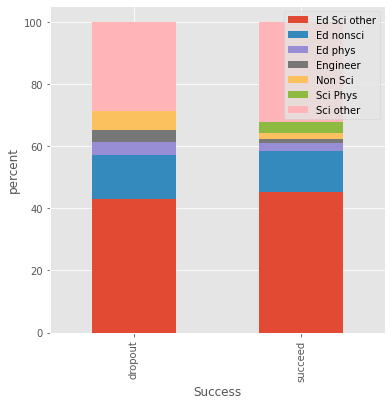

---------------------------
---------------------------
---------------------------
                    Username
Success Phys_major          
dropout No                45
        Yes                4
succeed No               427
        Yes               36
                     Username
Success Phys_major           
dropout No          91.836735
        Yes          8.163265
succeed No          92.224622
        Yes          7.775378
['No' 'Yes']


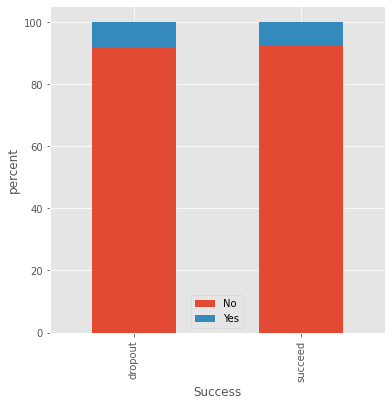

---------------------------
---------------------------
---------------------------
                    Username
Success Teach_exp           
dropout 0-5               20
        11-15              6
        16-20              4
        6-10              17
        มากกว่า 20         2
succeed 0-5              177
        11-15             58
        16-20             42
        6-10             129
        มากกว่า 20        57
                     Username
Success Teach_exp            
dropout 0-5         40.816327
        11-15       12.244898
        16-20        8.163265
        6-10        34.693878
        มากกว่า 20   4.081633
succeed 0-5         38.228942
        11-15       12.526998
        16-20        9.071274
        6-10        27.861771
        มากกว่า 20  12.311015
['0-5' '11-15' '16-20' '6-10' 'มากกว่า 20']


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s

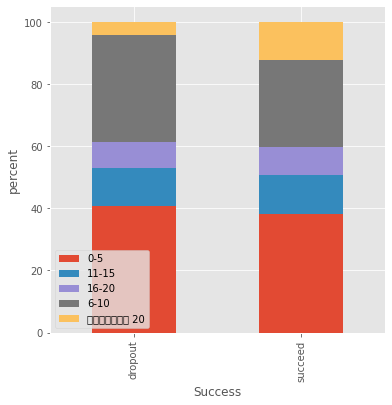

---------------------------
---------------------------
---------------------------
                   Username
Success EdLevel            
dropout Bachelor         34
        Master           15
succeed Bachelor        292
        Master          165
        Phd               5
        other             1
                    Username
Success EdLevel             
dropout Bachelor   69.387755
        Master     30.612245
succeed Bachelor   63.066955
        Master     35.637149
        Phd         1.079914
        other       0.215983
['Bachelor ' 'Master' 'Phd' 'other']


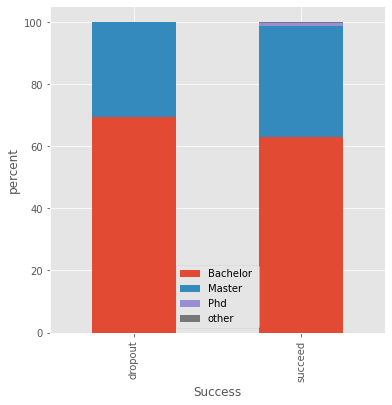

---------------------------
---------------------------
---------------------------
                          Username
Success Teach_sub_gensci          
dropout No                       9
        Yes                     40
succeed No                      67
        Yes                    396
                           Username
Success Teach_sub_gensci           
dropout No                18.367347
        Yes               81.632653
succeed No                14.470842
        Yes               85.529158
['No' 'Yes']


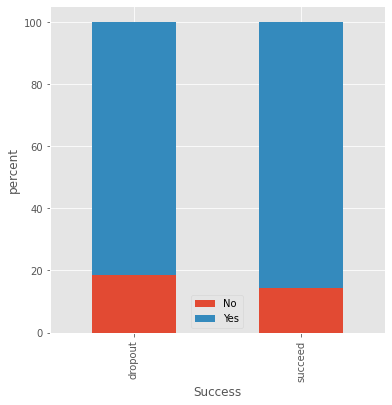

---------------------------
---------------------------
---------------------------
                         Username
Success Teach_level              
dropout Other                   4
        Primary                17
        lower secondary        28
succeed Other                  62
        Primary               114
        lower secondary       287
                          Username
Success Teach_level               
dropout Other             8.163265
        Primary          34.693878
        lower secondary  57.142857
succeed Other            13.390929
        Primary          24.622030
        lower secondary  61.987041
['Other' 'Primary' 'lower secondary']


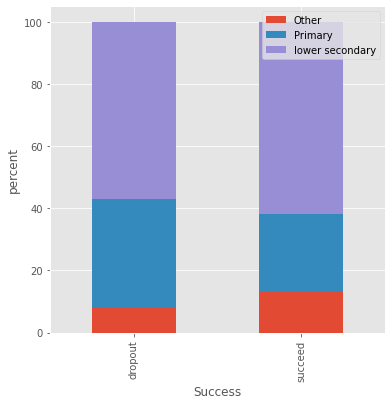

---------------------------
---------------------------
---------------------------
                    Username
Success M2_teacher          
dropout No                33
        Yes               16
succeed No               275
        Yes              188
                     Username
Success M2_teacher           
dropout No          67.346939
        Yes         32.653061
succeed No          59.395248
        Yes         40.604752
['No' 'Yes']


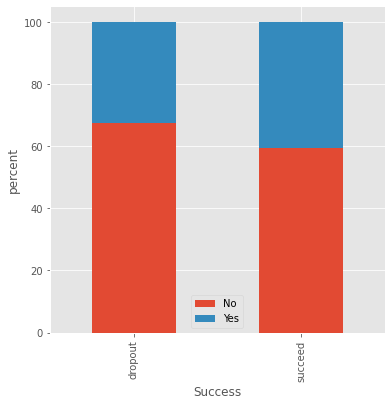

---------------------------
---------------------------
---------------------------
                 Username
Success Success          
dropout dropout        49
succeed succeed       463
                 Username
Success Success          
dropout dropout     100.0
succeed succeed     100.0
['dropout' 'succeed']


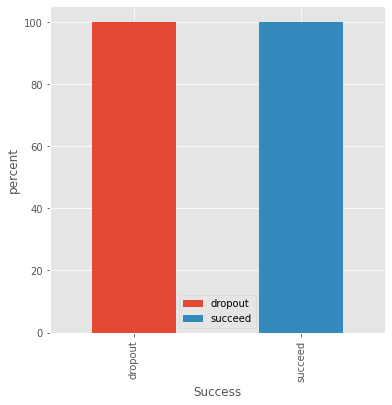

---------------------------
---------------------------
---------------------------
                        Username
Success Pre Test Level          
dropout High Pretest          15
        Low Pretest           34
succeed High Pretest         191
        Low Pretest          272
                         Username
Success Pre Test Level           
dropout High Pretest    30.612245
        Low Pretest     69.387755
succeed High Pretest    41.252700
        Low Pretest     58.747300
['High Pretest' 'Low Pretest']


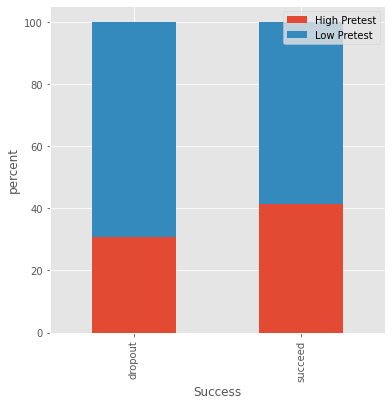

---------------------------
---------------------------
---------------------------
                                 Username
Success Pre Self Efficacy Level          
dropout High SelfEff                   23
        Low SelfEff                    26
succeed High SelfEff                  223
        Low SelfEff                   240
                                  Username
Success Pre Self Efficacy Level           
dropout High SelfEff             46.938776
        Low SelfEff              53.061224
succeed High SelfEff             48.164147
        Low SelfEff              51.835853
['High SelfEff' 'Low SelfEff']


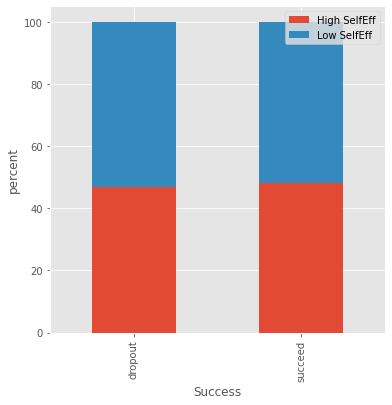

---------------------------
---------------------------
---------------------------


In [ ]:
#using for loop to analyse the same process with all item in column_names
for items in column_names:
  df2 = df.groupby(['Success', items]).agg({'Username': 'count'}) #group by success and interested variable (each column name in items) then count number of teacher
  print(df2)
  df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #convert number of teacher into percentage
  print(df3)
  a = df[items].unique()  #getting a list of unique values in each items
  a.sort()
  print(a)
  plt.style.use('ggplot')
  df3.unstack().plot(kind='bar',stacked=True,figsize=(6,6))   #plot a stack bar graph
  for items in a:  #create legend from a list of unique values in each items
    plt.legend(a)
  plt.ylabel("percent")
  plt.show()
  print("---------------------------")
  print("---------------------------")
  print("---------------------------")

###Section4 (older version Before developing For Loop): Finding out teachers who dropouted and who succeeded based on thier demographic and test scores 

In [ ]:
#group by success and edbackground, and get a count of teachers for each group. 
#Then change the counting number into percentage. and display results as a stack bar plot

In [ ]:
df2 = df.groupby(['Success', 'EdBackground']).agg({'Username': 'count'}) #counting
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calcualte percentage
print(df3)

                      Username
Success EdBackground          
dropout Ed Sci other        21
        Ed nonsci            7
        Ed phys              2
        Engineer             2
        Non Sci              3
        Sci other           14
succeed Ed Sci other       209
        Ed nonsci           61
        Ed phys             13
        Engineer             6
        Non Sci              8
        Sci Phys            17
        Sci other          149
                       Username
Success EdBackground           
dropout Ed Sci other  42.857143
        Ed nonsci     14.285714
        Ed phys        4.081633
        Engineer       4.081633
        Non Sci        6.122449
        Sci other     28.571429
succeed Ed Sci other  45.140389
        Ed nonsci     13.174946
        Ed phys        2.807775
        Engineer       1.295896
        Non Sci        1.727862
        Sci Phys       3.671706
        Sci other     32.181425


In [ ]:
#get a list of unique value in a column
a = df['EdBackground'].unique()
a.sort()
print(a)

['Ed Sci other' 'Ed nonsci' 'Ed phys' 'Engineer' 'Non Sci' 'Sci Phys'
 'Sci other']


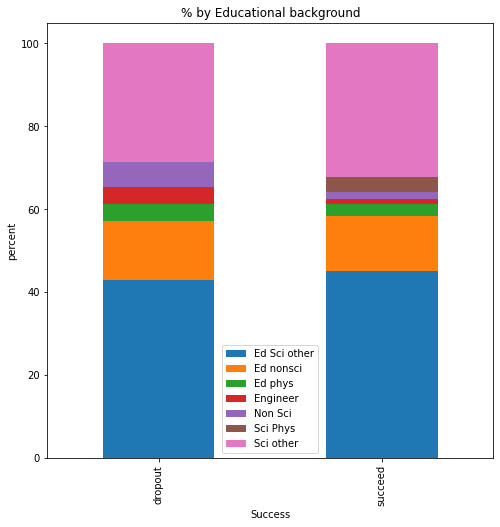

In [ ]:
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title("% by Educational background")
plt.xlabel("Success")
plt.ylabel("percent")
for items in a:  #create legend 
  plt.legend(a)
plt.show()

In [ ]:
#group by success and Phys_major, and get a count of teachers for each group. 
#Then change the counting number into percentage. and display results as a stack bar plot

                    Username
Success Phys_major          
dropout No                45
        Yes                4
succeed No               427
        Yes               36
                     Username
Success Phys_major           
dropout No          91.836735
        Yes          8.163265
succeed No          92.224622
        Yes          7.775378
['No' 'Yes']


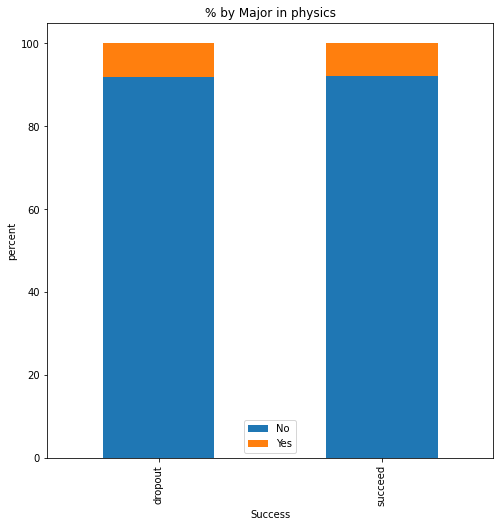

In [ ]:
df2 = df.groupby(['Success', 'Phys_major']).agg({'Username': 'count'}) #counting
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calcualte percentage
print(df3)
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title("% by Major in physics")
plt.xlabel("Success")
plt.ylabel("percent")
#get a list of unique value in a column
a = df['Phys_major'].unique()  
a.sort()
print(a)
for items in a:  #create legend 
  plt.legend(a)
plt.show()

In [ ]:
#group by success and Teach_exp, and get a count of teachers for each group. 
#Then change the counting number into percentage. and display results as a stack bar plot

                    Username
Success Teach_exp           
dropout 0-5               20
        11-15              6
        16-20              4
        6-10              17
        มากกว่า 20         2
succeed 0-5              177
        11-15             58
        16-20             42
        6-10             129
        มากกว่า 20        57
                     Username
Success Teach_exp            
dropout 0-5         40.816327
        11-15       12.244898
        16-20        8.163265
        6-10        34.693878
        มากกว่า 20   4.081633
succeed 0-5         38.228942
        11-15       12.526998
        16-20        9.071274
        6-10        27.861771
        มากกว่า 20  12.311015
['0-5' '11-15' '16-20' '6-10' 'มากกว่า 20']


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s

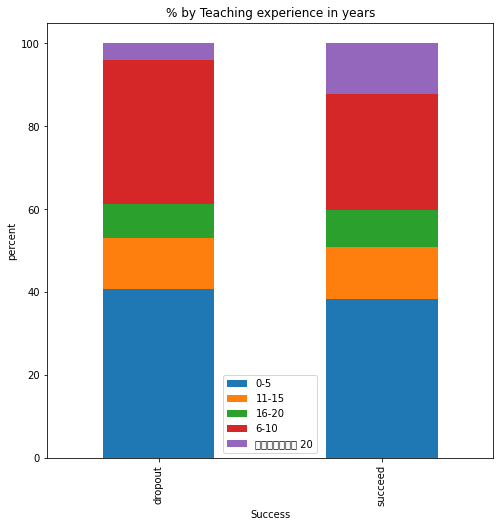

In [ ]:
df2 = df.groupby(['Success', 'Teach_exp']).agg({'Username': 'count'}) #counting
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calcualte percentage
print(df3)
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title("% by Teaching experience in years")
plt.xlabel("Success")
plt.ylabel("percent")
#get a list of unique value in a column
a = df['Teach_exp'].unique()
a.sort()
print(a)
for items in a:  #create legend 
  plt.legend(a)
plt.show()

In [ ]:
#group by success and EdLevel, and get a count of teachers for each group. 
#Then change the counting number into percentage. and display results as a stack bar plot

                   Username
Success EdLevel            
dropout Bachelor         34
        Master           15
succeed Bachelor        292
        Master          165
        Phd               5
        other             1
                    Username
Success EdLevel             
dropout Bachelor   69.387755
        Master     30.612245
succeed Bachelor   63.066955
        Master     35.637149
        Phd         1.079914
        other       0.215983
['Bachelor ' 'Master' 'Phd' 'other']


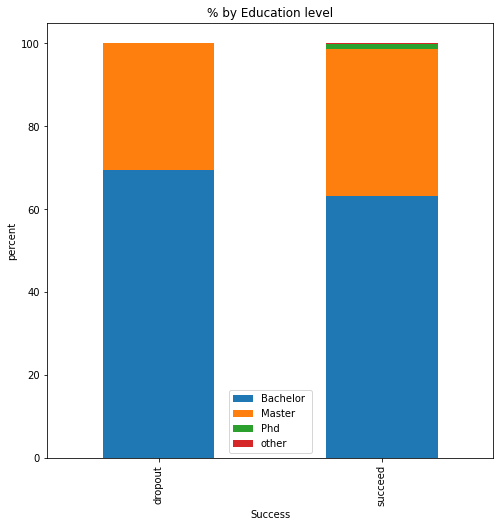

In [ ]:
df2 = df.groupby(['Success', 'EdLevel']).agg({'Username': 'count'}) #counting
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calcualte percentage
print(df3)
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title("% by Education level")
plt.xlabel("Success")
plt.ylabel("percent")
#get a list of unique value in a column
a = df['EdLevel'].unique()
a.sort()
print(a)
for items in a:  #create legend 
  plt.legend(a)
plt.show()

In [ ]:
#group by success and Teach_sub_gensci, and get a count of teachers for each group. 
#Then change the counting number into percentage. and display results as a stack bar plot

                          Username
Success Teach_sub_gensci          
dropout No                       9
        Yes                     40
succeed No                      67
        Yes                    396
                           Username
Success Teach_sub_gensci           
dropout No                18.367347
        Yes               81.632653
succeed No                14.470842
        Yes               85.529158
['No' 'Yes']


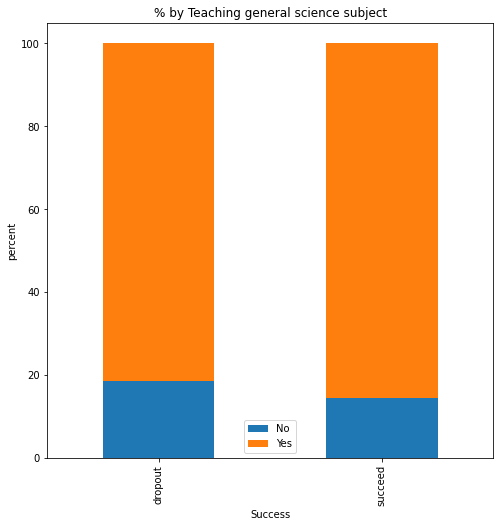

In [ ]:
df2 = df.groupby(['Success', 'Teach_sub_gensci']).agg({'Username': 'count'}) #counting
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calcualte percentage
print(df3)
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title("% by Teaching general science subject")
plt.xlabel("Success")
plt.ylabel("percent")
#get a list of unique value in a column
a = df['Teach_sub_gensci'].unique()
a.sort()
print(a)
for items in a:  #create legend 
  plt.legend(a)
plt.show()

In [ ]:
#group by success and Teach_level, and get a count of teachers for each group. 
#Then change the counting number into percentage. and display results as a stack bar plot

                         Username
Success Teach_level              
dropout Other                   4
        Primary                17
        lower secondary        28
succeed Other                  62
        Primary               114
        lower secondary       287
                          Username
Success Teach_level               
dropout Other             8.163265
        Primary          34.693878
        lower secondary  57.142857
succeed Other            13.390929
        Primary          24.622030
        lower secondary  61.987041
['Other' 'Primary' 'lower secondary']


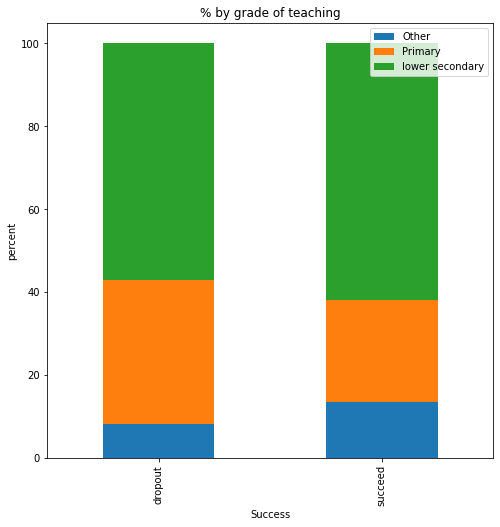

In [ ]:
df2 = df.groupby(['Success', 'Teach_level']).agg({'Username': 'count'}) #counting
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calcualte percentage
print(df3)
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title("% by grade of teaching")
plt.xlabel("Success")
plt.ylabel("percent")
#get a list of unique value in a column
a = df['Teach_level'].unique()
a.sort()
print(a)
for items in a:  #create legend 
  plt.legend(a)
plt.show()

In [ ]:
#group by success and M2_teacher, and get a count of teachers for each group. 
#Then change the counting number into percentage. and display results as a stack bar plot

                    Username
Success M2_teacher          
dropout No                33
        Yes               16
succeed No               275
        Yes              188
                     Username
Success M2_teacher           
dropout No          67.346939
        Yes         32.653061
succeed No          59.395248
        Yes         40.604752
['No' 'Yes']


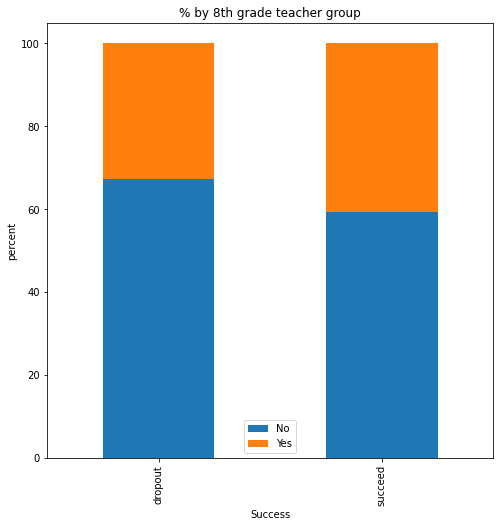

In [ ]:
df2 = df.groupby(['Success', 'M2_teacher']).agg({'Username': 'count'}) #counting
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calcualte percentage
print(df3)
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title("% by 8th grade teacher group")
plt.xlabel("Success")
plt.ylabel("percent")
#get a list of unique value in a column
a = df['M2_teacher'].unique()
a.sort()
print(a)
for items in a:  #create legend 
  plt.legend(a)
plt.show()

In [ ]:
#group by success and Pre Test Level, and get a count of teachers for each group. 
#Then change the counting number into percentage. and display results as a stack bar plot

                        Username
Success Pre Test Level          
dropout High Pretest          15
        Low Pretest           34
succeed High Pretest         191
        Low Pretest          272
                         Username
Success Pre Test Level           
dropout High Pretest    30.612245
        Low Pretest     69.387755
succeed High Pretest    41.252700
        Low Pretest     58.747300
['High Pretest' 'Low Pretest']


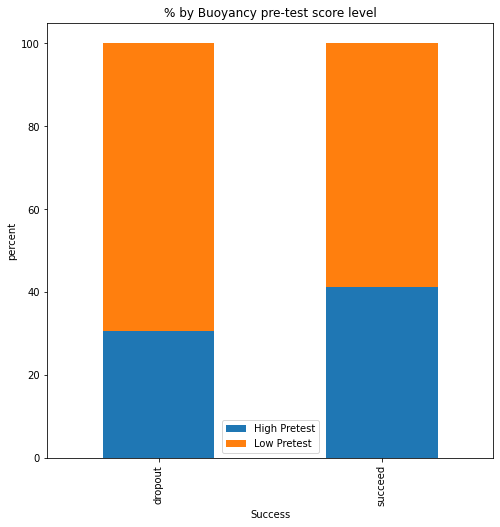

In [ ]:
df2 = df.groupby(['Success', 'Pre Test Level']).agg({'Username': 'count'}) #counting
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calcualte percentage
print(df3)
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title("% by Buoyancy pre-test score level")
plt.xlabel("Success")
plt.ylabel("percent")
#get a list of unique value in a column
a = df['Pre Test Level'].unique()
a.sort()
print(a)
for items in a:  #create legend 
  plt.legend(a)
plt.show()

In [ ]:
#group by success and Pre Self Efficacy Level, and get a count of teachers for each group. 
#Then change the counting number into percentage. and display results as a stack bar plot

                                 Username
Success Pre Self Efficacy Level          
dropout High SelfEff                   23
        Low SelfEff                    26
succeed High SelfEff                  223
        Low SelfEff                   240
                                  Username
Success Pre Self Efficacy Level           
dropout High SelfEff             46.938776
        Low SelfEff              53.061224
succeed High SelfEff             48.164147
        Low SelfEff              51.835853
['High SelfEff' 'Low SelfEff']


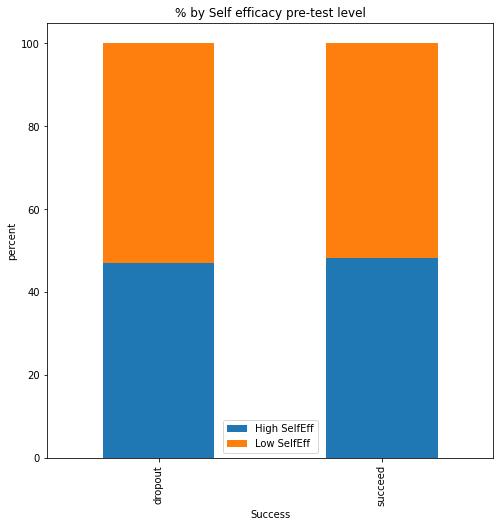

In [ ]:
df2 = df.groupby(['Success', 'Pre Self Efficacy Level']).agg({'Username': 'count'}) #counting
print(df2)
df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())) #calcualte percentage
print(df3)
df3.unstack().plot(kind='bar',stacked=True,figsize=(8,8))
plt.title("% by Self efficacy pre-test level")
plt.xlabel("Success")
plt.ylabel("percent")
#get a list of unique value in a column
a = df['Pre Self Efficacy Level'].unique()
a.sort()
print(a)
for items in a:  #create legend 
  plt.legend(a)
plt.show()

## Key Findings: Who failed and who succeeded?

Description...
1. There seems to be no difference in percentages of teachers who dropouted and succeeded in Major in physics and their self efficacy level.
2. These variables; Educational background, teaching experience, Highest education level, teaching subject, teaching level, and pre-test score seemed to have impact on whether the participants will finish the course. 
  2.1 Teachers who have educational background in science related fields such as environment science, logistic tend not to dropout but teachers who has background in non-science such as Thai language dropped out more.
  2.2 Teachers who have 6-10 years teaching experience seemed to drop out more.
  2.3 Teachers who has higher degree in education tend not to drop out.
  2.4 Teacher who are teaching general science subject, especialy in 8th grade tend to not drop out but teachers who are teaching in primary school tend to drop out.
  2.5 Teachers who has higher scores in pre-test in buoyancy concept tend not to drop out.


#Asking the second hypothesis driven question

In [ ]:
#Working with one database
#df_score = pd.read_excel('buoyancy_teacher_score.xlsx')


## Data Preparation (Data Cleaning):


Description...
1. Explore dataset and check for null value
2. Drop null values

#### Section 1 : Explore dataset and check for null value

In [ ]:
print(df_score.head()) 
print("---------------------")
print(df_score.shape)
print("---------------------")
print(df_score.info())
print("---------------------")
df_score.isnull().sum()

       Username  pretest_concept  posttest_noitem  posttest_concept  \
4      Nutchaya              5.0             17.0              15.0   
5      Piyaporn              4.0             17.0              12.0   
6  school123456              4.0             17.0              16.0   
7      poompooy              7.0             17.0               8.0   
8   Sangrawee28              7.0             17.0              10.0   

   pre_selfefficacy  post_selfefficacy  
4              71.0               76.0  
5              63.0               72.0  
6              60.0               64.0  
7              51.0               64.0  
8              67.0               80.0  
---------------------
(458, 6)
---------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 4 to 695
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Username           458 non-null    object 
 1   pretest_concept    45

Username             0
pretest_concept      0
posttest_noitem      0
posttest_concept     0
pre_selfefficacy     0
post_selfefficacy    0
dtype: int64

### Section 2 : Drop null values

In [ ]:
df_score.dropna(subset=['pretest_concept','posttest_concept','pre_selfefficacy','post_selfefficacy','posttest_noitem'], inplace=True)
print(df_score.isnull().sum())

Username             0
pretest_concept      0
posttest_noitem      0
posttest_concept     0
pre_selfefficacy     0
post_selfefficacy    0
dtype: int64


## Exploratory Data Analysis (EDA):

Description...
1. exploring simple statsitic and data distribution
2. computing correlation coefficient and correlation graph
3. comparing mean scores between pre-test and post-test

###Section 1 : exploring simple statsitic and data distribution

In [ ]:
df_score.describe()

,pretest_concept,posttest_noitem,posttest_concept,pre_selfefficacy,post_selfefficacy
count,458.000000,458.000000,458.000000,458.000000,458.000000
mean,6.812227,16.980349,13.759825,63.436681,69.443231
std,3.176036,0.313179,2.745030,6.448358,7.812214
min,1.000000,11.000000,3.000000,47.000000,51.000000
25%,5.000000,17.000000,12.000000,59.000000,64.000000
50%,6.000000,17.000000,15.000000,63.000000,69.000000
75%,8.000000,17.000000,16.000000,67.000000,75.000000
max,16.000000,17.000000,16.000000,84.000000,90.000000


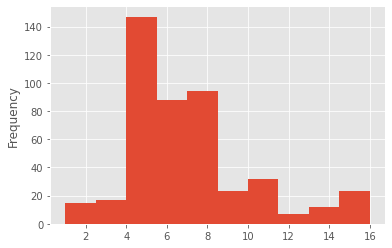

In [ ]:
df_score['pretest_concept'].plot(kind = 'hist')
plt.show()

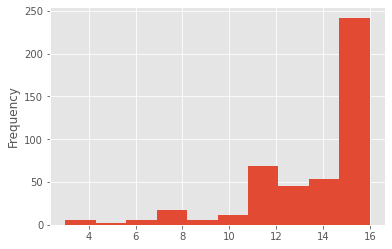

In [ ]:
df_score['posttest_concept'].plot(kind = 'hist')
plt.show()

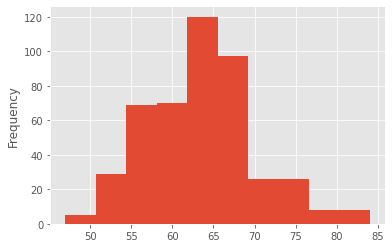

In [ ]:
df_score['pre_selfefficacy'].plot(kind = 'hist')
plt.show()

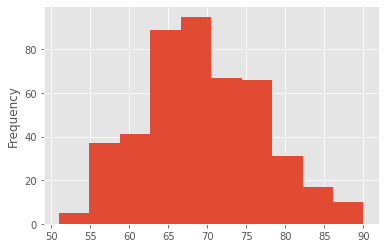

In [ ]:
df_score['post_selfefficacy'].plot(kind = 'hist')
plt.show()

In [ ]:
y= df_score['pretest_concept'].mean()
PretestCondition = [
    (df_score['pretest_concept'] < y),
    (df_score['pretest_concept'] >= y)
]
value = ['Low Pretest','High Pretest']
df_score['Pre Test Level'] = np.select(PretestCondition,value)
print(df_score.sample(10))
print("---------------------")
df_score.value_counts('Pre Test Level')

                   Username  pretest_concept  posttest_noitem  \
680             mayuree2510             16.0             17.0   
497     desuka__hotmail_com              NaN              NaN   
138                swanlika              6.0             17.0   
419   apinya12344_gmail_com              5.0             17.0   
633              atikan2535              NaN              NaN   
355      pakapanm_gmail_com              7.0             17.0   
362              sutisa0843              8.0              NaN   
200                 lek6886              8.0             17.0   
613           metta12122525              8.0             17.0   
473  wanpen271985_gmail_com              NaN              NaN   

     posttest_concept  pre_selfefficacy  post_selfefficacy Pre Test Level  
680              11.0              61.0               62.0   High Pretest  
497               NaN              66.0                NaN              0  
138              14.0              50.0               54

Pre Test Level
Low Pretest     390
High Pretest    245
0                61
dtype: int64

###Section 2 : computing correlation coefficient and correlation graph

In [ ]:
#computing correlation coefficient 
features=list(['pretest_concept','posttest_concept','pre_selfefficacy','post_selfefficacy'])
df_score[features].corr()

,pretest_concept,posttest_concept,pre_selfefficacy,post_selfefficacy
pretest_concept,1.000000,0.200876,0.168125,0.106810
posttest_concept,0.200876,1.000000,0.145752,0.197113
pre_selfefficacy,0.168125,0.145752,1.000000,0.556965
post_selfefficacy,0.106810,0.197113,0.556965,1.000000


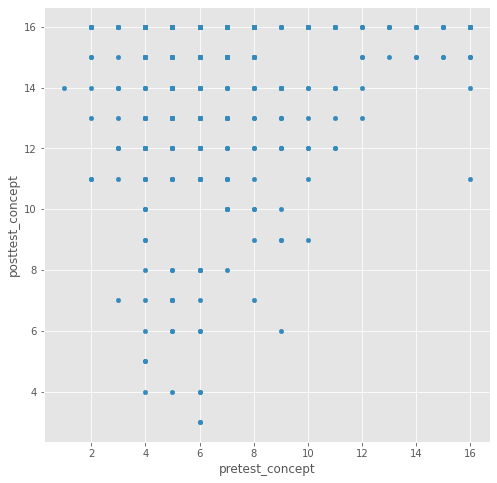

In [ ]:
df_score.plot(kind = 'scatter',figsize=(8,8), x = 'pretest_concept', y = 'posttest_concept')
plt.show()

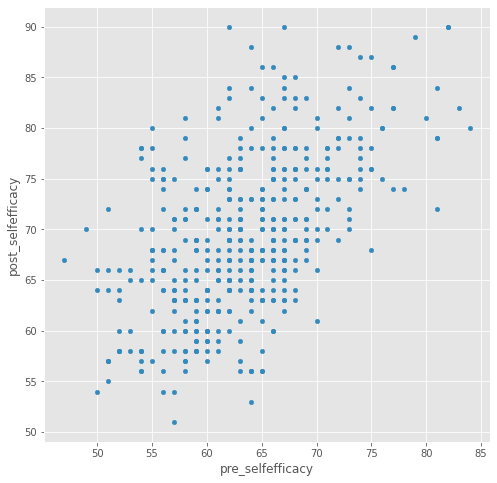

In [ ]:
df_score.plot(kind = 'scatter',figsize=(8,8), x = 'pre_selfefficacy', y = 'post_selfefficacy')
plt.show()

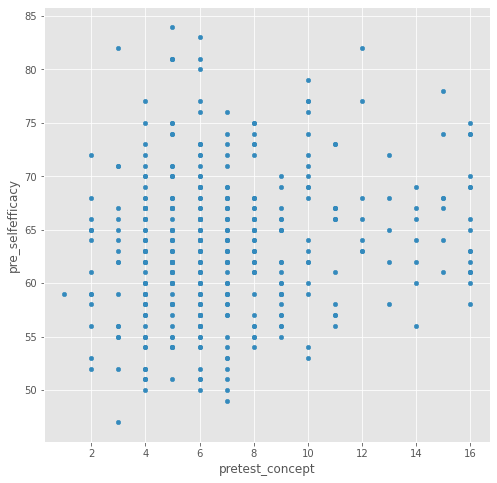

In [ ]:
df_score.plot(kind = 'scatter',figsize=(8,8), x = 'pretest_concept', y = 'pre_selfefficacy')
plt.show()

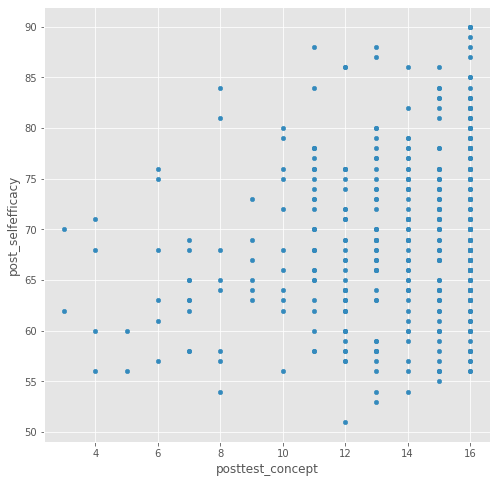

In [ ]:
df_score.plot(kind = 'scatter',figsize=(8,8), x = 'posttest_concept', y = 'post_selfefficacy')
plt.show()

###Section 3: comparing mean scores between pre-test and post-test

In [ ]:
#calculate mean scores
A= df_score['pretest_concept'].mean()
B= df_score['posttest_concept'].mean()
C= df_score['pre_selfefficacy'].mean()
D= df_score['post_selfefficacy'].mean()
print(A,B,C,D)

6.812227074235808 13.759825327510917 63.43668122270742 69.44323144104804


In [ ]:
data = {
"Pretest": [A, C],
"Posttest": [B,D]
}
df_mean = pd.DataFrame(data, index = ["Concept", "Self Efficacy"])
print(df_mean)

                 Pretest   Posttest
Concept         6.812227  13.759825
Self Efficacy  63.436681  69.443231


In [ ]:
#perform independent two sample t-test
from scipy.stats import ttest_rel
ttest_rel(df_score['pretest_concept'], df_score['posttest_concept'])

Ttest_relResult(statistic=-39.568845019122485, pvalue=1.0301707138794765e-149)

In [ ]:
ttest_rel(df_score['pre_selfefficacy'], df_score['post_selfefficacy']) #perform independent two sample t-test

Ttest_relResult(statistic=-18.851543041212896, pvalue=4.579897050695367e-59)

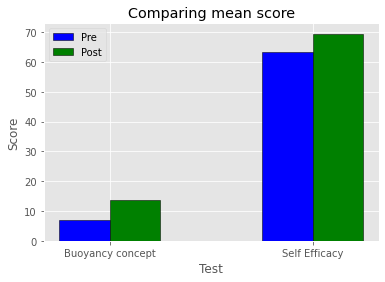

In [ ]:
#ploting bar graph comparing mean score
Pre = [A,C]
Post = [B,D]
n = 2
r = np.arange(n)
width = 0.25
plt.style.use('ggplot')
plt.bar(r, Pre, color = 'b',
        width = width, edgecolor = 'black',
        label='Pre')
plt.bar(r + width, Post, color = 'g',
        width = width, edgecolor = 'black',
        label='Post')
  
plt.xlabel("Test")
plt.ylabel("Score")
plt.title("Comparing mean score")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['Buoyancy concept','Self Efficacy'])
plt.legend()
  
plt.show()

## Key Findings: Does the course help teachers improve?

Description...
1. Both teachers' content knowledge and self efficacy improve after finished the course
2. There is medium correlation between teachers's pre and post self efficacy

##recommendation

Description..
The course is helpful but too difficult for some group of participants.
There seems to be indicatations implying that the online professional development about buoyancy is difficult to some group of teachers, thus we reccommend that 
1. clearly specify and highlight the purposes and intended audiences of the course.
2. use pre-test scores of the buoyancy concept as prerequisite. Only teachers who pass the cut scores can attend this course.
3. improve scaffolding structure of the course 
4. idevelop an alternative course  with simpler concept, more scaffolding and more helps during lesson 
5. gather more evidences 


<div class="alert alert-info">
<h3>Financial Benefit:</h3>
</div>

Description...


<div class="alert alert-info">
<h3>Non-Financial Benefit:</h3>
</div>

Description...
1. save time for at-risk of dropping out participants